In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix, cohen_kappa_score, roc_auc_score, mean_squared_error
# Crear una instancia del codificador de etiquetas
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor


# Carga de datasets

In [2]:
# Carga de los los datasets 
clasificacion_ruta = 'datasets/Student_performance_data _clasificacion.csv'
regresion_ruta = 'datasets/SalaryRegresion.csv'

df_clasificacion = pd.read_csv(clasificacion_ruta)
df2_regresion = pd.read_csv(regresion_ruta)


# Problema de Clasificación

In [3]:
df_clasificacion.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


### Prepocesamiento de Datos

In [4]:


# División de datos
X = df_clasificacion.drop(columns=['GradeClass'])
y = df_clasificacion['GradeClass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalado de características (opcional pero recomendado)
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

### Selección de Modelos

In [5]:
# Inicializa los modelos
svm_model = SVC(kernel='linear', C=1.0)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000, random_state=42)

### Entrenamiento y Ajuste de Hiperparámetros:


In [6]:
# Ajuste de hiperparámetros para Random Forest 
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializa el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Realiza la búsqueda en cuadrícula
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# El mejor modelo con los mejores hiperparámetros
best_rf_model = grid_search_rf.best_estimator_

In [7]:
# Ajuste de Hiperparámetros para SVM (Vector Support Machine):

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Inicializa el modelo SVM
svm_model = SVC()

# Realiza la búsqueda en cuadrícula
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# El mejor modelo con los mejores hiperparámetros
best_svm_model = grid_search_svm.best_estimator_

In [8]:
# Define los hiperparámetros a ajustar
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Inicializa el modelo Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Realiza la búsqueda en cuadrícula
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)

# El mejor modelo con los mejores hiperparámetros
best_gb_model = grid_search_gb.best_estimator_

In [9]:
# DefinAjuste de Hiperparámetros para MLP (Multilayer Perceptron):

param_grid_mlp = {
    'hidden_layer_sizes': [(64,), (64, 32), (128, 64)],
    'activation': ['relu', 'tanh'],
    'max_iter': [500, 1000, 1500]
}

# Inicializa el modelo MLP
mlp_model = MLPClassifier(random_state=42)

# Realiza la búsqueda en cuadrícula
grid_search_mlp = GridSearchCV(mlp_model, param_grid_mlp, cv=5, scoring='accuracy')
grid_search_mlp.fit(X_train, y_train)

# El mejor modelo con los mejores hiperparámetros
best_mlp_model = grid_search_mlp.best_estimator_

### Validación de los modelos

Suppor Vector Machine

Accuracy (CV): 0.8214
R2 Score: 0.7003
Kappa: 0.7088




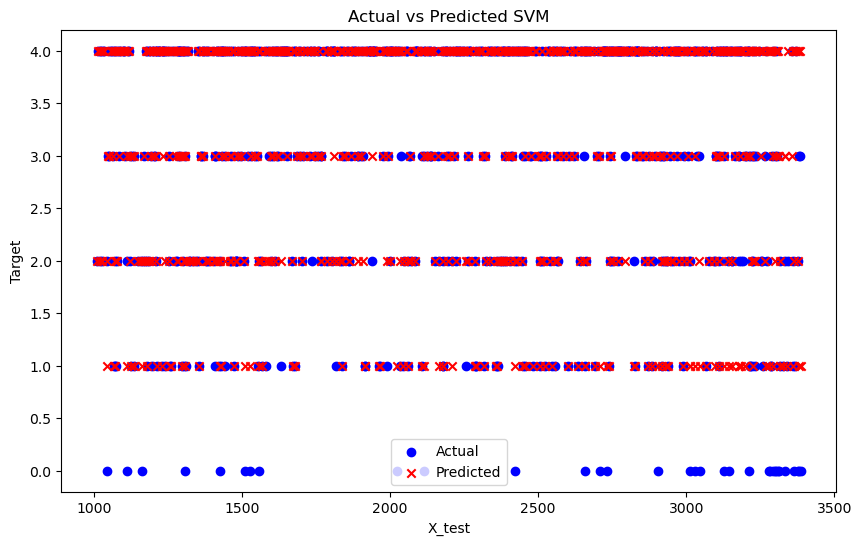

In [10]:
# Validación cruzada
print("Suppor Vector Machine\n")
cv_scores = cross_val_score(best_svm_model, X_train, y_train, cv=5, scoring='accuracy')

# Evaluación en conjunto de prueba
y_pred = best_svm_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

print(f"Accuracy (CV): {cv_scores.mean():.4f}")
print(f"R2 Score: {r2:.4f}")
print(f"Kappa: {kappa:.4f}\n\n")

X_test_1D =X_test["StudentID"]  # Selecciona la primera característica

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Graficar y_test
plt.scatter(X_test_1D, y_test, color='blue', marker='o', label='Actual')

# Graficar y_pred
plt.scatter(X_test_1D, y_pred, color='red',marker='x', label='Predicted')

# Añadir etiquetas y título
plt.xlabel('X_test')
plt.ylabel('Target')
plt.title('Actual vs Predicted SVM')
plt.legend()

# Mostrar la gráfica
plt.show()



Random Forest:

Accuracy (CV): 0.9247
R2 Score: 0.7807
Kappa: 0.8713




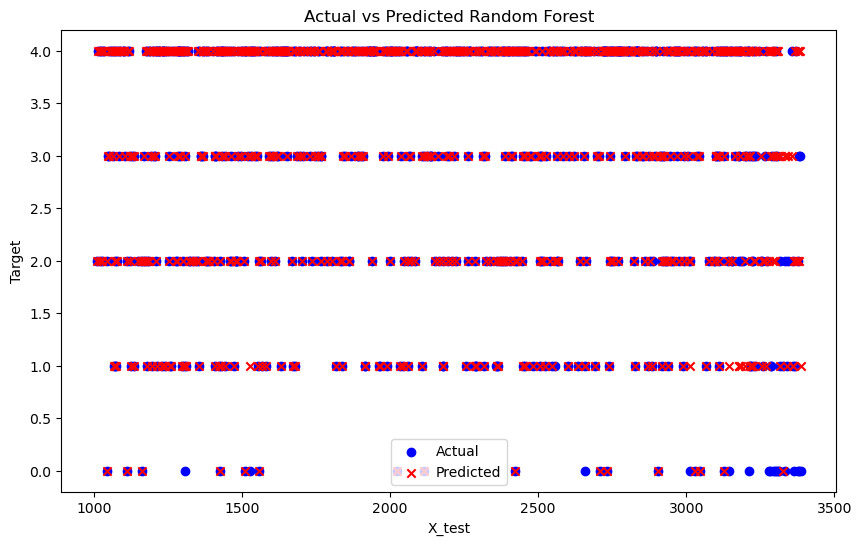

In [11]:
# Validación cruzada
print("Random Forest:\n")
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Evaluación en conjunto de prueba
y_pred = best_rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

print(f"Accuracy (CV): {cv_scores.mean():.4f}")
print(f"R2 Score: {r2:.4f}")
print(f"Kappa: {kappa:.4f}\n\n")

X_test_1D =X_test["StudentID"]  # Selecciona la primera característica

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Graficar y_test
plt.scatter(X_test_1D, y_test, color='blue', marker='o', label='Actual')

# Graficar y_pred
plt.scatter(X_test_1D, y_pred, color='red',marker='x', label='Predicted')

# Añadir etiquetas y título
plt.xlabel('X_test')
plt.ylabel('Target')
plt.title('Actual vs Predicted Random Forest')
plt.legend()

# Mostrar la gráfica
plt.show()



Gradient Boosting

Gradient Boosting

Accuracy (CV): 0.9373
R2 Score: 0.7277
Kappa: 0.8752




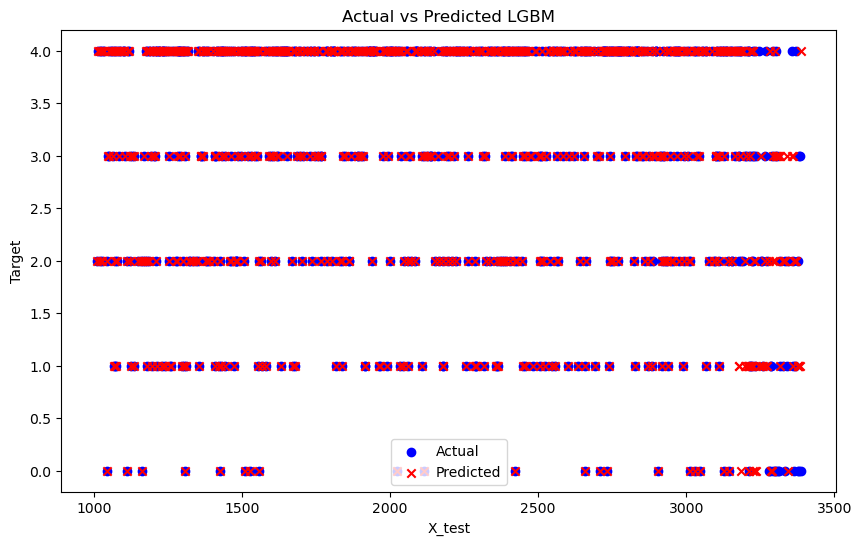

In [12]:
# Validación cruzada
print("Gradient Boosting\n")

cv_scores = cross_val_score(best_gb_model, X_train, y_train, cv=5, scoring='accuracy')

# Evaluación en conjunto de prueba
y_pred = best_gb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
# Validación cruzada
print("Gradient Boosting\n")

cv_scores = cross_val_score(best_gb_model, X_train, y_train, cv=5, scoring='accuracy')

# Evaluación en conjunto de prueba
y_pred = best_gb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

print(f"Accuracy (CV): {cv_scores.mean():.4f}")
print(f"R2 Score: {r2:.4f}")
print(f"Kappa: {kappa:.4f}\n\n")

X_test_1D =X_test["StudentID"]  # Selecciona la primera característica

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Graficar y_test
plt.scatter(X_test_1D, y_test, color='blue', marker='o', label='Actual')

# Graficar y_pred
plt.scatter(X_test_1D, y_pred, color='red',marker='x', label='Predicted')

# Añadir etiquetas y título
plt.xlabel('X_test')
plt.ylabel('Target')
plt.title('Actual vs Predicted LGBM')
plt.legend()

# Mostrar la gráfica
plt.show()



Multilayer Perceptron

Accuracy (CV): 0.7467
R2 Score: 0.5604
Kappa: 0.4824


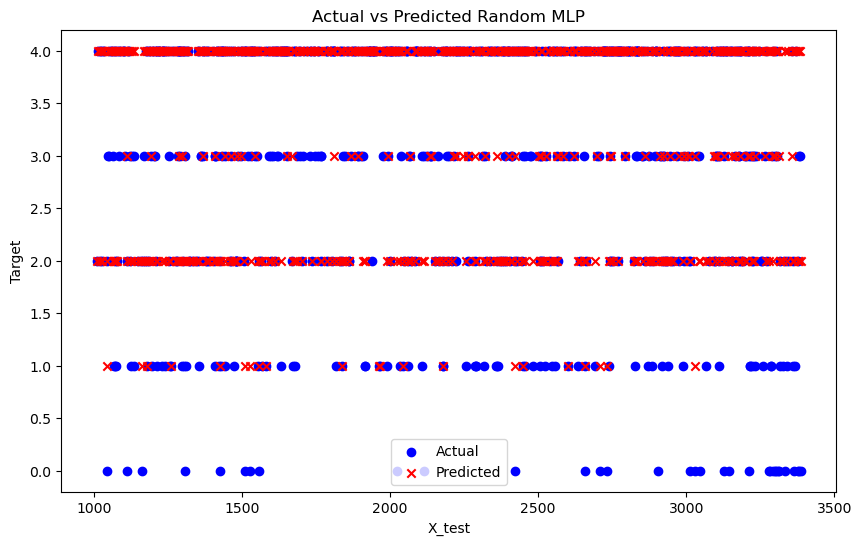

In [13]:

# Validación cruzada
print("Multilayer Perceptron\n")
cv_scores = cross_val_score(best_mlp_model, X_train, y_train, cv=5, scoring='accuracy')

# Evaluación en conjunto de prueba
y_pred = best_mlp_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

print(f"Accuracy (CV): {cv_scores.mean():.4f}")
print(f"R2 Score: {r2:.4f}")
print(f"Kappa: {kappa:.4f}")

X_test_1D =X_test["StudentID"]  # Selecciona la primera característica

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Graficar y_test
plt.scatter(X_test_1D, y_test, color='blue', marker='o', label='Actual')

# Graficar y_pred
plt.scatter(X_test_1D, y_pred, color='red',marker='x', label='Predicted')

# Añadir etiquetas y título
plt.xlabel('X_test')
plt.ylabel('Target')
plt.title('Actual vs Predicted Random MLP')
plt.legend()

# Mostrar la gráfica
plt.show()

## Conclusiones

Tanto SVM, RF y GB llegaron a parámetros de R2 y Kappas aceptables para clasificar con excepción de MLP, se podría probar con otras funciones de activación como ser una función sigmoide o softmax. 

Dentro de las 3 con buenos scores, se destaca no positivamente SVM, pese a que se usó un kernel lineal donde la complejidad computacional deberia ser más baja que otras, el tiempo de optimización de hiperparámetros fue mucho más alto que el resto llegando en la última prueba a 81 minutos frente a 8 minutos en promedio de random forest y gradient Boosting.

Para este caso particular la función que mejor clasifica el dataset, dado si R2 Accuracy y Kappa es Random Forest

Para futuros pasos se podría usar diferentes kernels y funciones de activación para SVM y MLP además de usar otros métodos de optimización de hiperparámetros más eficientes como lo es optuna ya que Gridsearch tiende a ser greedy

# Problema de Regresión

In [14]:
# División de datos
X = df2_regresion.drop(columns=['Salary'])
y = df2_regresion['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
df2_regresion.head(2)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205


### Prepocesamiento de Datos

In [16]:
# División de datos
X = df2_regresion.drop(columns=['Salary'])
y = df2_regresion['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Inicialización de modelos

In [17]:
# Inicializa los modelos
svr_model = SVR()
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
mlp_model = MLPRegressor(max_iter=1000, random_state=42)

### Ajuste de Hiperparámetros

In [18]:
# Ajuste de hiperparámetros para Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='r2')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

In [19]:
# Ajuste de Hiperparámetros para SVR
param_grid_svr = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search_svr = GridSearchCV(svr_model, param_grid_svr, cv=5, scoring='r2')
grid_search_svr.fit(X_train, y_train)
best_svr_model = grid_search_svr.best_estimator_

In [20]:
# Ajuste de Hiperparámetros para Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='r2')
grid_search_gb.fit(X_train, y_train)
best_gb_model = grid_search_gb.best_estimator_

In [21]:
# Ajuste de Hiperparámetros para MLPRegressor
param_grid_mlp = {
    'hidden_layer_sizes': [(64,), (64, 32), (128, 64)],
    'activation': ['relu', 'tanh'],
    'max_iter': [500, 1000, 1500]
}

grid_search_mlp = GridSearchCV(mlp_model, param_grid_mlp, cv=5, scoring='r2')
grid_search_mlp.fit(X_train, y_train)
best_mlp_model = grid_search_mlp.best_estimator_

c:\Users\Charly\anaconda3\envs\ldi2\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Charly\anaconda3\envs\ldi2\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Charly\anaconda3\envs\ldi2\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Charly\anaconda3\envs\ldi2\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Charly\anaconda3\en

### Validación de modelos

In [22]:
# Validación cruzada para SVR
cv_scores_svr = cross_val_score(best_svr_model, X_train, y_train, cv=5, scoring='r2')
print("Support Vector Regression\n")

# Evaluación en conjunto de prueba para SVR
y_pred_svr = best_svr_model.predict(X_test)
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f"R2 (Test): {r2_svr:.4f}")
print(f"MSE: {mse_svr:.4f}\n\n")




Support Vector Regression

R2 (Test): 0.1511
MSE: 508625284.4444




In [23]:
# Validación cruzada para Random Forest
cv_scores_rf = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='r2')
print("Random Forest Regressor\n")

# Evaluación en conjunto de prueba para Random Forest
y_pred_rf = best_rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"R2 (Test): {r2_rf:.4f}")
print(f"MSE: {mse_rf:.4f}\n\n")



Random Forest Regressor

R2 (Test): 0.9478
MSE: 31272970.3344




In [24]:
# Validación cruzada para Gradient Boosting
cv_scores_gb = cross_val_score(best_gb_model, X_train, y_train, cv=5, scoring='r2')
print("Gradient Boosting Regressor\n")

# Evaluación en conjunto de prueba para Gradient Boosting
y_pred_gb = best_gb_model.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"R2 (Test): {r2_gb:.4f}")
print(f"MSE: {mse_gb:.4f}\n\n")



Gradient Boosting Regressor

R2 (Test): 0.9027
MSE: 58318339.4571




In [25]:
# Validación cruzada para MLP Regressor
cv_scores_mlp = cross_val_score(best_mlp_model, X_train, y_train, cv=5, scoring='r2')
print("MLP Regressor\n")

# Evaluación en conjunto de prueba para MLP Regressor
y_pred_mlp = best_mlp_model.predict(X_test)
r2_mlp = r2_score(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print(f"R2 (Test): {r2_mlp:.4f}")
print(f"MSE: {mse_mlp:.4f}\n\n")



c:\Users\Charly\anaconda3\envs\ldi2\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Charly\anaconda3\envs\ldi2\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Charly\anaconda3\envs\ldi2\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Charly\anaconda3\envs\ldi2\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Regressor

R2 (Test): 0.8568
MSE: 85814793.6751




c:\Users\Charly\anaconda3\envs\ldi2\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  warnings.warn(


# Conclusiones

Para el ejemplo dado se ve que tanto RF, MLP y GB tienen buenos scores de predicción, SVR es muy bajo, al igual que en el problema anterior se podría chequear con diferentes kernels para evaluar potenciales mejoras en el ajuste de los problemas

De los modelos dados y para este ejemplo nuevamente gana Random forest con un R2 de 0,94 y con MSE menos que el resto.

Para futuros experemientos tambíen se podría cambiar la metodología de optimización de hiperparámetros y poner a competir estos modelos con un dataset más grande y complejo ya que dado la simpleza del mismo no se pudo evaluar los tiempos computacionales por no haber demoras signigivativas (Lo mas significativo fue la optimización de Random Forest que demoro 2 minutos)